# 🔬 Análise Comparativa: Maceração A vs Maceração B

## 📋 Objetivo
Comparar os processos de maceração A e B em termos de:
- **Controle térmico** (estabilidade de temperatura)
- **Eficiência de tempo** (duração e consistência)
- **Correlação Tempo→Temperatura** (padrões de perda/ganho térmico)
- **Qualidade operacional** (outliers, anomalias)

### 🎯 Perguntas-chave:
1. Qual processo tem melhor controle térmico?
2. Qual é mais eficiente em termos de tempo?
3. Qual apresenta comportamento mais previsível?
4. Qual deve ser usado como referência para otimizações?

## 📚 1. Importar Bibliotecas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Bibliotecas carregadas com sucesso!")

✓ Bibliotecas carregadas com sucesso!


## 📂 2. Carregar Dados

In [90]:
# Carregar planilha
arquivo = 'Dados maceração.xlsx'

# Dados de temperatura
df_resumo = pd.read_excel(arquivo, sheet_name='Resumo')
print(f"✓ Dados de temperatura carregados: {df_resumo.shape}")

# Dados de tempo
df_tempo = pd.read_excel(arquivo, sheet_name='Tempo mac')
print(f"✓ Dados de tempo carregados: {df_tempo.shape}")

# Identificar coluna de período
col_periodo = df_resumo.columns[0]
print(f"\n📅 Coluna de período: '{col_periodo}'")

✓ Dados de temperatura carregados: (19, 34)
✓ Dados de tempo carregados: (3164, 13)

📅 Coluna de período: 'Mês/Ano'


## 🔄 3. Processar Dados de Temperatura - Maceração A

In [91]:
# Identificar colunas de temperatura A
cols_temp_A = [col for col in df_resumo.columns if 'Maceração A - Temperatura' in col]
print(f"Colunas de temperatura A: {len(cols_temp_A)}")

# Extrair dados
df_temp_A = df_resumo[[col_periodo] + cols_temp_A].copy()

# Converter para numérico
for col in cols_temp_A:
    df_temp_A[col] = pd.to_numeric(
        df_temp_A[col].astype(str).str.replace(',', '.'),
        errors='coerce'
    )

# Calcular estatísticas
df_temp_A['Temperatura'] = df_temp_A[cols_temp_A].mean(axis=1)
df_temp_A['Temp_std'] = df_temp_A[cols_temp_A].std(axis=1)
df_temp_A['Temp_min'] = df_temp_A[cols_temp_A].min(axis=1)
df_temp_A['Temp_max'] = df_temp_A[cols_temp_A].max(axis=1)
df_temp_A['Temp_delta'] = df_temp_A['Temp_max'] - df_temp_A['Temp_min']

# Converter período para datetime
df_temp_A[col_periodo] = pd.to_datetime(df_temp_A[col_periodo], errors='coerce')
df_temp_A = df_temp_A.dropna(subset=[col_periodo])
df_temp_A = df_temp_A.set_index(col_periodo)

print(f"\n✓ Temperatura A processada: {len(df_temp_A)} registros")
print(f"   Média: {df_temp_A['Temperatura'].mean():.2f}°C")
print(f"   Desvio: {df_temp_A['Temp_std'].mean():.2f}°C")

Colunas de temperatura A: 12

✓ Temperatura A processada: 17 registros
   Média: 49.77°C
   Desvio: 0.71°C


## 🔄 4. Processar Dados de Temperatura - Maceração B

In [92]:
# Identificar colunas de temperatura B
cols_temp_B = [col for col in df_resumo.columns if 'Maceração B - Temperatura' in col]
print(f"Colunas de temperatura B: {len(cols_temp_B)}")

# Extrair dados
df_temp_B = df_resumo[[col_periodo] + cols_temp_B].copy()

# Converter para numérico
for col in cols_temp_B:
    df_temp_B[col] = pd.to_numeric(
        df_temp_B[col].astype(str).str.replace(',', '.'),
        errors='coerce'
    )

# Calcular estatísticas
df_temp_B['Temperatura'] = df_temp_B[cols_temp_B].mean(axis=1)
df_temp_B['Temp_std'] = df_temp_B[cols_temp_B].std(axis=1)
df_temp_B['Temp_min'] = df_temp_B[cols_temp_B].min(axis=1)
df_temp_B['Temp_max'] = df_temp_B[cols_temp_B].max(axis=1)
df_temp_B['Temp_delta'] = df_temp_B['Temp_max'] - df_temp_B['Temp_min']

# Converter período para datetime
df_temp_B[col_periodo] = pd.to_datetime(df_temp_B[col_periodo], errors='coerce')
df_temp_B = df_temp_B.dropna(subset=[col_periodo])
df_temp_B = df_temp_B.set_index(col_periodo)

print(f"\n✓ Temperatura B processada: {len(df_temp_B)} registros")
print(f"   Média: {df_temp_B['Temperatura'].mean():.2f}°C")
print(f"   Desvio: {df_temp_B['Temp_std'].mean():.2f}°C")

Colunas de temperatura B: 9

✓ Temperatura B processada: 17 registros
   Média: 48.73°C
   Desvio: 0.51°C


## ⏱️ 5. Processar Dados de Tempo

In [93]:
# Filtrar apenas dados de tempo de maceração
df_tempo = df_tempo[df_tempo['Indicador'] == 'Tempo de maceração'].copy()

# Converter coluna de data
df_tempo['Date'] = pd.to_datetime(df_tempo['Date'], errors='coerce')
df_tempo['Periodo'] = df_tempo['Date'].dt.to_period('M').dt.to_timestamp()

# MACERAÇÃO A
df_tempo_A = df_tempo[df_tempo['Folha'].str.contains('moagem A|Moagem A', case=False, na=False)].copy()
df_tempo_A_grouped = df_tempo_A.groupby('Periodo').agg({
    'Valor_numero': ['mean', 'std', 'min', 'max', 'count']
})
df_tempo_A_grouped.columns = ['Tempo', 'Tempo_std', 'Tempo_min', 'Tempo_max', 'Tempo_count']
print(f"✓ Tempo A processado: {len(df_tempo_A_grouped)} registros")
print(f"   Média: {df_tempo_A_grouped['Tempo'].mean():.1f} min")

# MACERAÇÃO B
df_tempo_B = df_tempo[df_tempo['Folha'].str.contains('moagem B|Moagem B', case=False, na=False)].copy()
df_tempo_B_grouped = df_tempo_B.groupby('Periodo').agg({
    'Valor_numero': ['mean', 'std', 'min', 'max', 'count']
})
df_tempo_B_grouped.columns = ['Tempo', 'Tempo_std', 'Tempo_min', 'Tempo_max', 'Tempo_count']
print(f"✓ Tempo B processado: {len(df_tempo_B_grouped)} registros")
print(f"   Média: {df_tempo_B_grouped['Tempo'].mean():.1f} min")

✓ Tempo A processado: 20 registros
   Média: 62.9 min
✓ Tempo B processado: 18 registros
   Média: 61.7 min


In [94]:
# Verificar colunas disponíveis
print("Colunas disponíveis em df_tempo:")
print(df_tempo.columns.tolist())

Colunas disponíveis em df_tempo:
['Mês/Ano', 'Date', 'Hora', 'Folha', 'EtapaProcesso', 'Equipamento', 'ASPEN', 'Indicador', 'Valor', 'Valor_numero', 'Fato', 'Causa', 'Acao', 'Periodo']


In [95]:
# Ver amostra dos dados de tempo
print(df_tempo[df_tempo['Folha'].str.contains('moagem', case=False, na=False)].head(10))

  Mês/Ano       Date        Hora                Folha EtapaProcesso  \
0  jan/26 2026-01-22  Indefinido  Fechamento moagem A        Moagem   
1  jan/26 2026-01-22  Indefinido  Fechamento moagem B        Moagem   
2  jan/26 2026-01-22  Indefinido  Fechamento moagem B        Moagem   
3  jan/26 2026-01-21  Indefinido  Fechamento moagem A        Moagem   
4  jan/26 2026-01-21  Indefinido  Fechamento moagem A        Moagem   
5  jan/26 2026-01-21  Indefinido  Fechamento moagem A        Moagem   
6  jan/26 2026-01-21  Indefinido  Fechamento moagem B        Moagem   
7  jan/26 2026-01-21  Indefinido  Fechamento moagem B        Moagem   
8  jan/26 2026-01-21  Indefinido  Fechamento moagem B        Moagem   
9  jan/26 2026-01-21  Indefinido  Fechamento moagem B        Moagem   

   Equipamento  ASPEN           Indicador  Valor  Valor_numero  Fato  Causa  \
0          NaN    NaN  Tempo de maceração   38.0          38.0   NaN    NaN   
1          NaN    NaN  Tempo de maceração   38.0          38

## 🔗 6. Alinhar Dados (Tempo + Temperatura)

In [96]:
# MACERAÇÃO A
df_A = df_tempo_A_grouped.join(df_temp_A[['Temperatura', 'Temp_std', 'Temp_delta']], how='inner')
df_A = df_A.dropna(subset=['Tempo', 'Temperatura'])

# Filtrar período 2024-2026
df_A = df_A[(df_A.index >= '2024-01-01') & (df_A.index <= '2026-12-31')]

print(f"✓ Dataset A alinhado: {len(df_A)} meses")
print(f"   Período: {df_A.index.min().strftime('%b/%Y')} até {df_A.index.max().strftime('%b/%Y')}")

# MACERAÇÃO B
df_B = df_tempo_B_grouped.join(df_temp_B[['Temperatura', 'Temp_std', 'Temp_delta']], how='inner')
df_B = df_B.dropna(subset=['Tempo', 'Temperatura'])

# Filtrar período 2024-2026
df_B = df_B[(df_B.index >= '2024-01-01') & (df_B.index <= '2026-12-31')]

print(f"\n✓ Dataset B alinhado: {len(df_B)} meses")
print(f"   Período: {df_B.index.min().strftime('%b/%Y')} até {df_B.index.max().strftime('%b/%Y')}")

✓ Dataset A alinhado: 17 meses
   Período: Sep/2024 até Jan/2026

✓ Dataset B alinhado: 17 meses
   Período: Sep/2024 até Jan/2026


## 📊 7. Estatísticas Descritivas Comparativas

In [97]:
# Criar DataFrame comparativo
stats_comp = pd.DataFrame({
    'Maceração A': [
        df_A['Temperatura'].mean(),
        df_A['Temperatura'].std(),
        df_A['Temperatura'].min(),
        df_A['Temperatura'].max(),
        df_A['Temp_std'].mean(),
        df_A['Tempo'].mean(),
        df_A['Tempo'].std(),
        df_A['Tempo'].min(),
        df_A['Tempo'].max(),
        len(df_A)
    ],
    'Maceração B': [
        df_B['Temperatura'].mean(),
        df_B['Temperatura'].std(),
        df_B['Temperatura'].min(),
        df_B['Temperatura'].max(),
        df_B['Temp_std'].mean(),
        df_B['Tempo'].mean(),
        df_B['Tempo'].std(),
        df_B['Tempo'].min(),
        df_B['Tempo'].max(),
        len(df_B)
    ]
}, index=[
    'Temp Média (°C)',
    'Temp Desvio Padrão (°C)',
    'Temp Mínima (°C)',
    'Temp Máxima (°C)',
    'Variabilidade Interna (°C)',
    'Tempo Médio (min)',
    'Tempo Desvio Padrão (min)',
    'Tempo Mínimo (min)',
    'Tempo Máximo (min)',
    'Nº Observações'
])

# Adicionar coluna de diferença
stats_comp['Diferença (B - A)'] = stats_comp['Maceração B'] - stats_comp['Maceração A']
stats_comp['Diferença %'] = ((stats_comp['Maceração B'] - stats_comp['Maceração A']) / stats_comp['Maceração A'] * 100)

print("="*80)
print("ESTATÍSTICAS COMPARATIVAS - MACERAÇÃO A vs B")
print("="*80)
print(stats_comp.round(2))
print("="*80)

ESTATÍSTICAS COMPARATIVAS - MACERAÇÃO A vs B
                            Maceração A  Maceração B  Diferença (B - A)  \
Temp Média (°C)                   49.77        48.73              -1.04   
Temp Desvio Padrão (°C)            0.57         0.87               0.30   
Temp Mínima (°C)                  48.32        47.58              -0.74   
Temp Máxima (°C)                  50.58        50.63               0.05   
Variabilidade Interna (°C)         0.71         0.51              -0.19   
Tempo Médio (min)                 67.76        62.41              -5.36   
Tempo Desvio Padrão (min)          7.24         8.19               0.95   
Tempo Mínimo (min)                50.83        51.33               0.49   
Tempo Máximo (min)                80.02        82.52               2.50   
Nº Observações                    17.00        17.00               0.00   

                            Diferença %  
Temp Média (°C)                   -2.08  
Temp Desvio Padrão (°C)           52.19  
Tem

## 📈 8. Análise de Regressão: Tempo → Temperatura

In [98]:
# REGRESSÃO A
slope_A, intercept_A, r_value_A, p_value_A, std_err_A = stats.linregress(
    df_A['Tempo'], df_A['Temperatura']
)

# REGRESSÃO B
slope_B, intercept_B, r_value_B, p_value_B, std_err_B = stats.linregress(
    df_B['Tempo'], df_B['Temperatura']
)

# Criar DataFrame comparativo
reg_comp = pd.DataFrame({
    'Maceração A': [
        slope_A,
        intercept_A,
        r_value_A,
        r_value_A**2,
        p_value_A,
        std_err_A,
        'Sim' if p_value_A < 0.05 else 'Não'
    ],
    'Maceração B': [
        slope_B,
        intercept_B,
        r_value_B,
        r_value_B**2,
        p_value_B,
        std_err_B,
        'Sim' if p_value_B < 0.05 else 'Não'
    ]
}, index=[
    'Coeficiente Angular (°C/min)',
    'Intercepto (°C)',
    'Correlação (r)',
    'R² (Explicação)',
    'P-valor',
    'Erro Padrão',
    'Significância (p<0.05)'
])

print("\n" + "="*80)
print("REGRESSÃO LINEAR: TEMPO → TEMPERATURA")
print("="*80)
print(reg_comp)
print("="*80)

print(f"\n📐 EQUAÇÃO A: Temperatura = {slope_A:.6f} × Tempo + {intercept_A:.2f}")
print(f"📐 EQUAÇÃO B: Temperatura = {slope_B:.6f} × Tempo + {intercept_B:.2f}")


REGRESSÃO LINEAR: TEMPO → TEMPERATURA
                             Maceração A Maceração B
Coeficiente Angular (°C/min)   -0.028107    0.033149
Intercepto (°C)                51.669901   46.660123
Correlação (r)                 -0.356087    0.312161
R² (Explicação)                 0.126798    0.097444
P-valor                         0.160665    0.222538
Erro Padrão                     0.019045    0.026049
Significância (p<0.05)               Não         Não

📐 EQUAÇÃO A: Temperatura = -0.028107 × Tempo + 51.67
📐 EQUAÇÃO B: Temperatura = 0.033149 × Tempo + 46.66


## 📊 9. Visualização: Dispersão e Regressão Lado a Lado

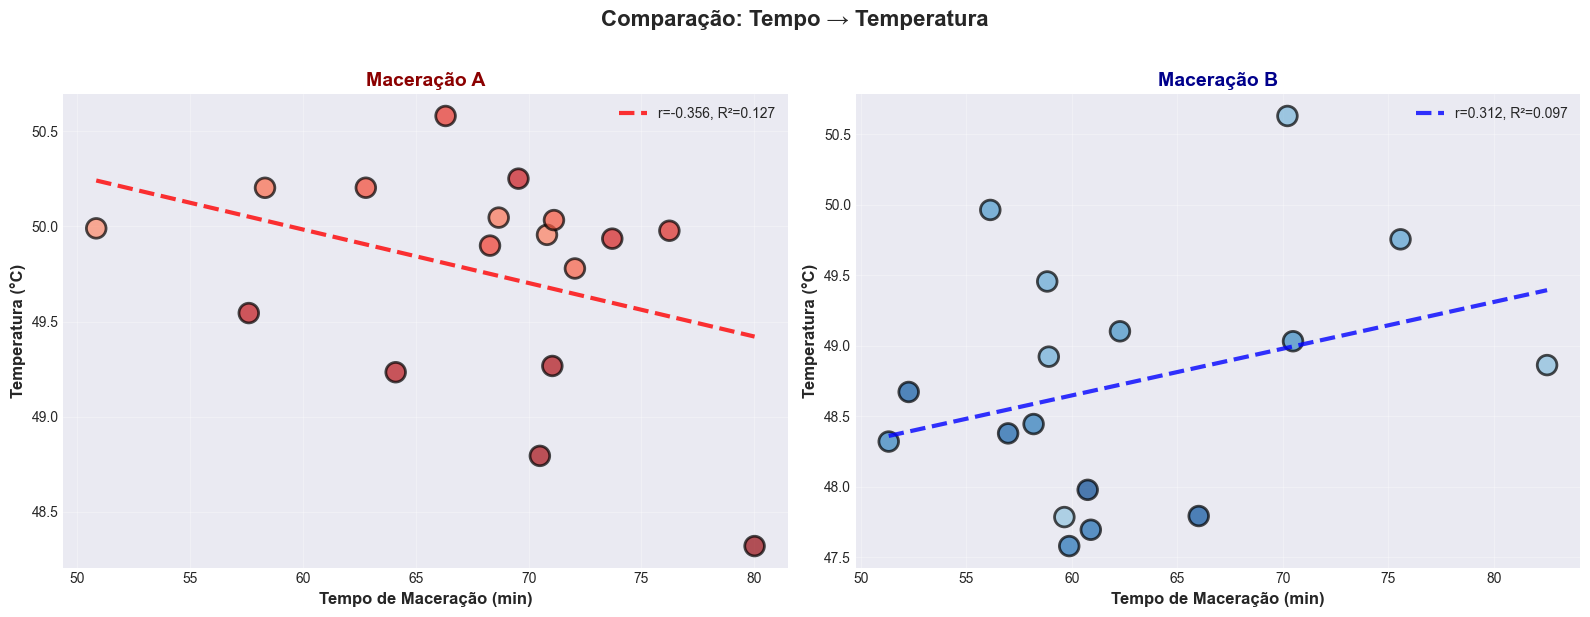

✓ Gráfico de dispersão comparativo gerado!


In [99]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MACERAÇÃO A
ax1 = axes[0]
colors_A = plt.cm.Reds(np.linspace(0.4, 0.9, len(df_A)))
ax1.scatter(df_A['Tempo'], df_A['Temperatura'], s=200, c=colors_A, alpha=0.7, edgecolors='black', linewidth=2)
x_line_A = np.linspace(df_A['Tempo'].min(), df_A['Tempo'].max(), 100)
y_line_A = slope_A * x_line_A + intercept_A
ax1.plot(x_line_A, y_line_A, 'r--', linewidth=3, alpha=0.8, label=f'r={r_value_A:.3f}, R²={r_value_A**2:.3f}')
ax1.set_xlabel('Tempo de Maceração (min)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax1.set_title('Maceração A', fontweight='bold', fontsize=14, color='#8B0000')
ax1.legend(loc='best', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# MACERAÇÃO B
ax2 = axes[1]
colors_B = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_B)))
ax2.scatter(df_B['Tempo'], df_B['Temperatura'], s=200, c=colors_B, alpha=0.7, edgecolors='black', linewidth=2)
x_line_B = np.linspace(df_B['Tempo'].min(), df_B['Tempo'].max(), 100)
y_line_B = slope_B * x_line_B + intercept_B
ax2.plot(x_line_B, y_line_B, 'b--', linewidth=3, alpha=0.8, label=f'r={r_value_B:.3f}, R²={r_value_B**2:.3f}')
ax2.set_xlabel('Tempo de Maceração (min)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax2.set_title('Maceração B', fontweight='bold', fontsize=14, color='#00008B')
ax2.legend(loc='best', framealpha=0.9)
ax2.grid(True, alpha=0.3)

plt.suptitle('Comparação: Tempo → Temperatura', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ Gráfico de dispersão comparativo gerado!")

## 📈 10. Evolução Temporal Comparativa

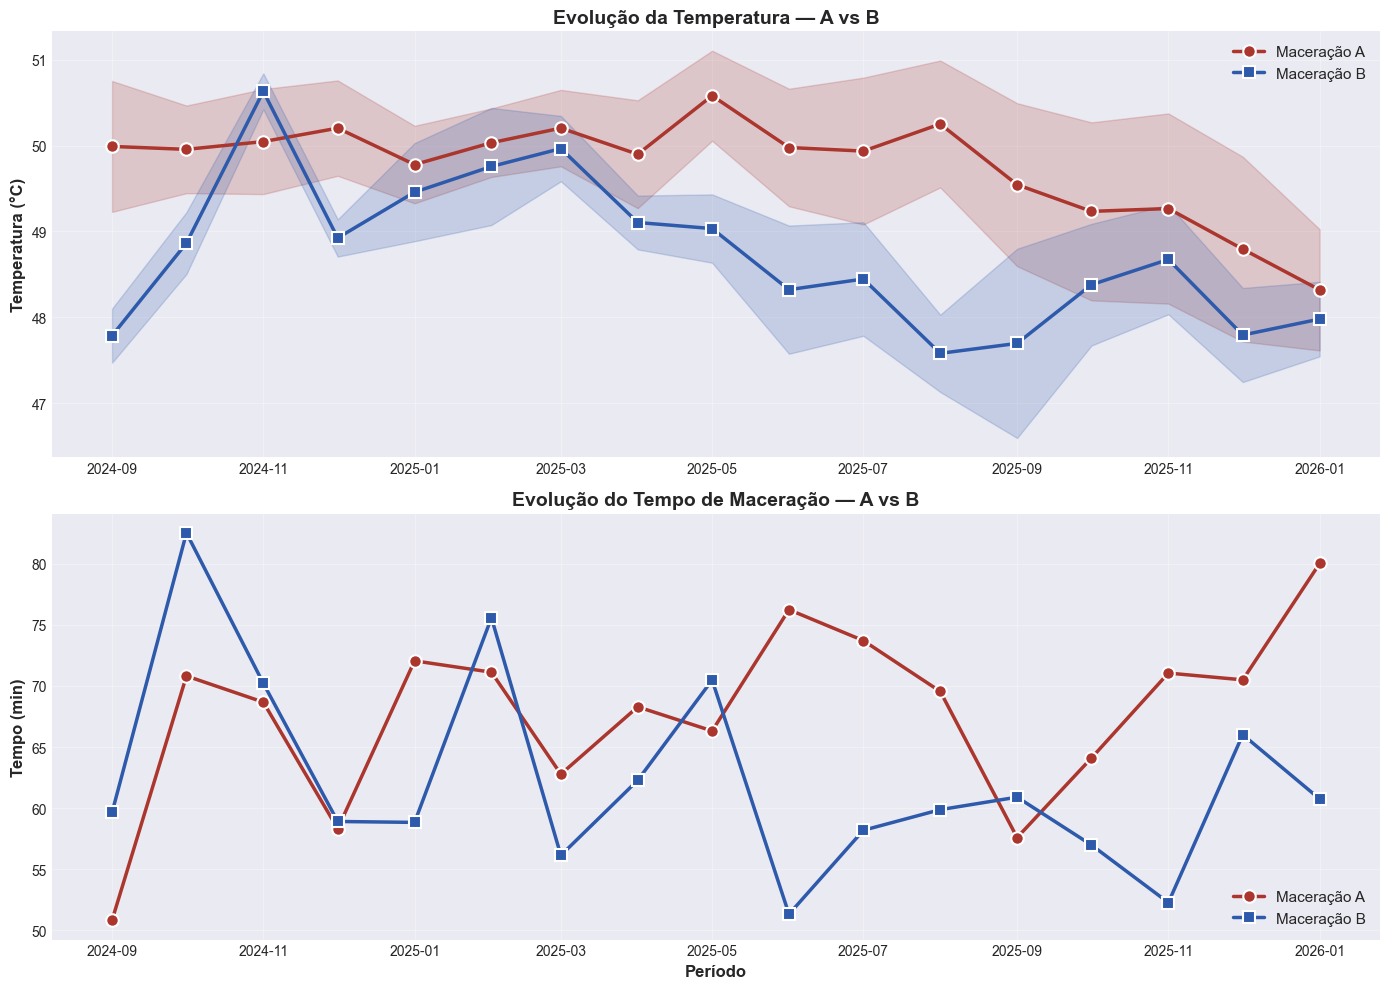

✓ Gráfico de evolução temporal comparativo gerado!


In [100]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# TEMPERATURA
ax1 = axes[0]
ax1.plot(df_A.index, df_A['Temperatura'], marker='o', linewidth=2.5, color='#AB362E', 
         markersize=9, label='Maceração A', markeredgecolor='white', markeredgewidth=1.5)
ax1.fill_between(df_A.index, 
                  df_A['Temperatura'] - df_A['Temp_std'],
                  df_A['Temperatura'] + df_A['Temp_std'],
                  alpha=0.2, color='#AB362E')

ax1.plot(df_B.index, df_B['Temperatura'], marker='s', linewidth=2.5, color='#2E5AAB', 
         markersize=9, label='Maceração B', markeredgecolor='white', markeredgewidth=1.5)
ax1.fill_between(df_B.index,
                  df_B['Temperatura'] - df_B['Temp_std'],
                  df_B['Temperatura'] + df_B['Temp_std'],
                  alpha=0.2, color='#2E5AAB')

ax1.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax1.set_title('Evolução da Temperatura — A vs B', fontweight='bold', fontsize=14)
ax1.legend(loc='best', framealpha=0.9, fontsize=11)
ax1.grid(True, alpha=0.3)

# TEMPO
ax2 = axes[1]
ax2.plot(df_A.index, df_A['Tempo'], marker='o', linewidth=2.5, color='#AB362E', 
         markersize=9, label='Maceração A', markeredgecolor='white', markeredgewidth=1.5)
ax2.plot(df_B.index, df_B['Tempo'], marker='s', linewidth=2.5, color='#2E5AAB', 
         markersize=9, label='Maceração B', markeredgecolor='white', markeredgewidth=1.5)

ax2.set_xlabel('Período', fontweight='bold', fontsize=12)
ax2.set_ylabel('Tempo (min)', fontweight='bold', fontsize=12)
ax2.set_title('Evolução do Tempo de Maceração — A vs B', fontweight='bold', fontsize=14)
ax2.legend(loc='best', framealpha=0.9, fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Gráfico de evolução temporal comparativo gerado!")

## 📊 11. Comparação de Distribuições (Boxplots)

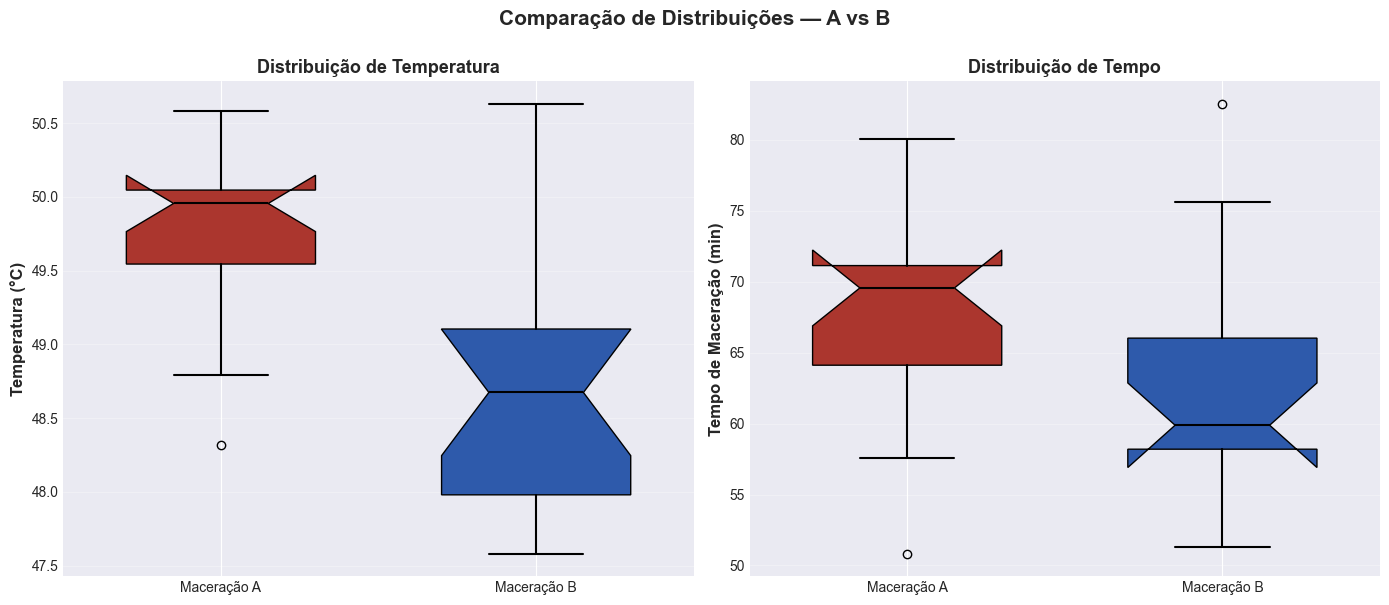

✓ Boxplots comparativos gerados!


In [101]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# TEMPERATURA
ax1 = axes[0]
data_temp = [df_A['Temperatura'].dropna(), df_B['Temperatura'].dropna()]
bp1 = ax1.boxplot(data_temp, labels=['Maceração A', 'Maceração B'], 
                   patch_artist=True, notch=True, widths=0.6)
bp1['boxes'][0].set_facecolor('#AB362E')
bp1['boxes'][1].set_facecolor('#2E5AAB')
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='black', linewidth=1.5)
ax1.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax1.set_title('Distribuição de Temperatura', fontweight='bold', fontsize=13)
ax1.grid(axis='y', alpha=0.3)

# TEMPO
ax2 = axes[1]
data_tempo = [df_A['Tempo'].dropna(), df_B['Tempo'].dropna()]
bp2 = ax2.boxplot(data_tempo, labels=['Maceração A', 'Maceração B'], 
                   patch_artist=True, notch=True, widths=0.6)
bp2['boxes'][0].set_facecolor('#AB362E')
bp2['boxes'][1].set_facecolor('#2E5AAB')
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp2[element], color='black', linewidth=1.5)
ax2.set_ylabel('Tempo de Maceração (min)', fontweight='bold', fontsize=12)
ax2.set_title('Distribuição de Tempo', fontweight='bold', fontsize=13)
ax2.grid(axis='y', alpha=0.3)

plt.suptitle('Comparação de Distribuições — A vs B', fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Boxplots comparativos gerados!")

## 🎯 12. Testes Estatísticos

In [102]:
# Teste t para temperatura
t_stat_temp, p_val_temp = stats.ttest_ind(df_A['Temperatura'].dropna(), df_B['Temperatura'].dropna())

# Teste t para tempo
t_stat_tempo, p_val_tempo = stats.ttest_ind(df_A['Tempo'].dropna(), df_B['Tempo'].dropna())

# Teste F para variâncias (Temperatura)
f_stat_temp = df_A['Temperatura'].var() / df_B['Temperatura'].var()
dfn_temp = len(df_A['Temperatura']) - 1
dfd_temp = len(df_B['Temperatura']) - 1
p_val_f_temp = 2 * min(stats.f.cdf(f_stat_temp, dfn_temp, dfd_temp), 
                        1 - stats.f.cdf(f_stat_temp, dfn_temp, dfd_temp))

# Teste F para variâncias (Tempo)
f_stat_tempo = df_A['Tempo'].var() / df_B['Tempo'].var()
dfn_tempo = len(df_A['Tempo']) - 1
dfd_tempo = len(df_B['Tempo']) - 1
p_val_f_tempo = 2 * min(stats.f.cdf(f_stat_tempo, dfn_tempo, dfd_tempo),
                         1 - stats.f.cdf(f_stat_tempo, dfn_tempo, dfd_tempo))

print("\n" + "="*80)
print("TESTES ESTATÍSTICOS DE COMPARAÇÃO")
print("="*80)

print("\n🔬 Teste t (Diferença de Médias):")
print(f"   TEMPERATURA: t={t_stat_temp:.4f}, p-valor={p_val_temp:.6f}")
print(f"   {'✓ Diferença SIGNIFICATIVA' if p_val_temp < 0.05 else '✗ Diferença NÃO significativa'} (α=0.05)")
print(f"\n   TEMPO: t={t_stat_tempo:.4f}, p-valor={p_val_tempo:.6f}")
print(f"   {'✓ Diferença SIGNIFICATIVA' if p_val_tempo < 0.05 else '✗ Diferença NÃO significativa'} (α=0.05)")

print("\n🔬 Teste F (Comparação de Variâncias):")
print(f"   TEMPERATURA: F={f_stat_temp:.4f}, p-valor={p_val_f_temp:.6f}")
print(f"   {'✓ Variâncias DIFERENTES' if p_val_f_temp < 0.05 else '✗ Variâncias SIMILARES'} (α=0.05)")
print(f"\n   TEMPO: F={f_stat_tempo:.4f}, p-valor={p_val_f_tempo:.6f}")
print(f"   {'✓ Variâncias DIFERENTES' if p_val_f_tempo < 0.05 else '✗ Variâncias SIMILARES'} (α=0.05)")

print("\n" + "="*80)


TESTES ESTATÍSTICOS DE COMPARAÇÃO

🔬 Teste t (Diferença de Médias):
   TEMPERATURA: t=4.1061, p-valor=0.000260
   ✓ Diferença SIGNIFICATIVA (α=0.05)

   TEMPO: t=2.0202, p-valor=0.051799
   ✗ Diferença NÃO significativa (α=0.05)

🔬 Teste F (Comparação de Variâncias):
   TEMPERATURA: F=0.4318, p-valor=0.102946
   ✗ Variâncias SIMILARES (α=0.05)

   TEMPO: F=0.7814, p-valor=0.627699
   ✗ Variâncias SIMILARES (α=0.05)



## 💡 13. Interpretação e Conclusões

In [103]:
print("\n" + "="*80)
print("🎯 CONCLUSÕES DA ANÁLISE COMPARATIVA")
print("="*80)

print("\n1️⃣ CONTROLE TÉRMICO:")
if stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A'] < stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B']:
    print("   🏆 VENCEDOR: Maceração A (menor variabilidade)")
    print(f"   - Variação A: {stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A']:.2f}°C")
    print(f"   - Variação B: {stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B']:.2f}°C")
else:
    print("   🏆 VENCEDOR: Maceração B (menor variabilidade)")
    print(f"   - Variação B: {stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B']:.2f}°C")
    print(f"   - Variação A: {stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A']:.2f}°C")

print("\n2️⃣ EFICIÊNCIA DE TEMPO:")
if stats_comp.loc['Tempo Médio (min)', 'Maceração A'] < stats_comp.loc['Tempo Médio (min)', 'Maceração B']:
    print("   🏆 VENCEDOR: Maceração A (processo mais rápido)")
    print(f"   - Tempo A: {stats_comp.loc['Tempo Médio (min)', 'Maceração A']:.1f} min")
    print(f"   - Tempo B: {stats_comp.loc['Tempo Médio (min)', 'Maceração B']:.1f} min")
    diff_percent = abs(stats_comp.loc['Tempo Médio (min)', 'Diferença %'])
    print(f"   - Diferença: {diff_percent:.1f}% mais rápido")
else:
    print("   🏆 VENCEDOR: Maceração B (processo mais rápido)")
    print(f"   - Tempo B: {stats_comp.loc['Tempo Médio (min)', 'Maceração B']:.1f} min")
    print(f"   - Tempo A: {stats_comp.loc['Tempo Médio (min)', 'Maceração A']:.1f} min")
    diff_percent = abs(stats_comp.loc['Tempo Médio (min)', 'Diferença %'])
    print(f"   - Diferença: {diff_percent:.1f}% mais rápido")

print("\n3️⃣ PREVISIBILIDADE (Correlação Tempo→Temperatura):")
if abs(r_value_A) > abs(r_value_B):
    print("   🏆 VENCEDOR: Maceração A (correlação mais forte)")
    print(f"   - Correlação A: r={r_value_A:.3f}, R²={r_value_A**2:.3f} ({r_value_A**2*100:.1f}%)")
    print(f"   - Correlação B: r={r_value_B:.3f}, R²={r_value_B**2:.3f} ({r_value_B**2*100:.1f}%)")
else:
    print("   🏆 VENCEDOR: Maceração B (correlação mais forte)")
    print(f"   - Correlação B: r={r_value_B:.3f}, R²={r_value_B**2:.3f} ({r_value_B**2*100:.1f}%)")
    print(f"   - Correlação A: r={r_value_A:.3f}, R²={r_value_A**2:.3f} ({r_value_A**2*100:.1f}%)")

print("\n4️⃣ PERDA/GANHO TÉRMICO:")
print(f"   Maceração A: {abs(slope_A):.6f}°C/min ({'PERDA' if slope_A < 0 else 'GANHO'})")
print(f"   Maceração B: {abs(slope_B):.6f}°C/min ({'PERDA' if slope_B < 0 else 'GANHO'})")
if abs(slope_A) < abs(slope_B):
    print(f"   🏆 VENCEDOR: Maceração A (menor taxa de variação térmica)")
else:
    print(f"   🏆 VENCEDOR: Maceração B (menor taxa de variação térmica)")

print("\n" + "="*80)
print("🎯 RECOMENDAÇÃO FINAL")
print("="*80)

# Contagem de "vitórias"
score_A = 0
score_B = 0

if stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A'] < stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B']:
    score_A += 1
else:
    score_B += 1

if stats_comp.loc['Tempo Médio (min)', 'Maceração A'] < stats_comp.loc['Tempo Médio (min)', 'Maceração B']:
    score_A += 1
else:
    score_B += 1

if abs(r_value_A) > abs(r_value_B):
    score_A += 1
else:
    score_B += 1

if abs(slope_A) < abs(slope_B):
    score_A += 1
else:
    score_B += 1

print(f"\nPlacar: Maceração A [{score_A}/4] vs Maceração B [{score_B}/4]")
print("\n")
if score_A > score_B:
    print("👑 PROCESSO RECOMENDADO: MACERAÇÃO A")
    print("   Razões: Melhor desempenho geral nos critérios avaliados")
elif score_B > score_A:
    print("👑 PROCESSO RECOMENDADO: MACERAÇÃO B")
    print("   Razões: Melhor desempenho geral nos critérios avaliados")
else:
    print("⚖️ EMPATE TÉCNICO")
    print("   Ambos os processos apresentam vantagens complementares.")
    print("   Recomenda-se análise adicional considerando custos e qualidade do produto.")

print("\n" + "="*80)


🎯 CONCLUSÕES DA ANÁLISE COMPARATIVA

1️⃣ CONTROLE TÉRMICO:
   🏆 VENCEDOR: Maceração A (menor variabilidade)
   - Variação A: 0.57°C
   - Variação B: 0.87°C

2️⃣ EFICIÊNCIA DE TEMPO:
   🏆 VENCEDOR: Maceração B (processo mais rápido)
   - Tempo B: 62.4 min
   - Tempo A: 67.8 min
   - Diferença: 7.9% mais rápido

3️⃣ PREVISIBILIDADE (Correlação Tempo→Temperatura):
   🏆 VENCEDOR: Maceração A (correlação mais forte)
   - Correlação A: r=-0.356, R²=0.127 (12.7%)
   - Correlação B: r=0.312, R²=0.097 (9.7%)

4️⃣ PERDA/GANHO TÉRMICO:
   Maceração A: 0.028107°C/min (PERDA)
   Maceração B: 0.033149°C/min (GANHO)
   🏆 VENCEDOR: Maceração A (menor taxa de variação térmica)

🎯 RECOMENDAÇÃO FINAL

Placar: Maceração A [3/4] vs Maceração B [1/4]


👑 PROCESSO RECOMENDADO: MACERAÇÃO A
   Razões: Melhor desempenho geral nos critérios avaliados



## 📄 14. Exportar Relatório HTML Comparativo

In [104]:
import base64
from io import BytesIO

print("📝 Gerando relatório HTML comparativo...")

def fig_to_base64(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png', dpi=150, bbox_inches='tight')
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return img_base64

# GRÁFICO 1: Dispersões comparativas
fig1, axes = plt.subplots(1, 2, figsize=(16, 6))
ax1 = axes[0]
colors_A = plt.cm.Reds(np.linspace(0.4, 0.9, len(df_A)))
ax1.scatter(df_A['Tempo'], df_A['Temperatura'], s=200, c=colors_A, alpha=0.7, edgecolors='black', linewidth=2)
x_line_A = np.linspace(df_A['Tempo'].min(), df_A['Tempo'].max(), 100)
y_line_A = slope_A * x_line_A + intercept_A
ax1.plot(x_line_A, y_line_A, 'r--', linewidth=3)
ax1.set_xlabel('Tempo (min)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax1.set_title('Maceração A', fontweight='bold', fontsize=14, color="#008B2E")
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
colors_B = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_B)))
ax2.scatter(df_B['Tempo'], df_B['Temperatura'], s=200, c=colors_B, alpha=0.7, edgecolors='black', linewidth=2)
x_line_B = np.linspace(df_B['Tempo'].min(), df_B['Tempo'].max(), 100)
y_line_B = slope_B * x_line_B + intercept_B
ax2.plot(x_line_B, y_line_B, 'b--', linewidth=3)
ax2.set_xlabel('Tempo (min)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax2.set_title('Maceração B', fontweight='bold', fontsize=14, color='#00008B')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
img_dispersao = fig_to_base64(fig1)
plt.close(fig1)

# GRÁFICO 2: Evolução temporal
fig2, axes = plt.subplots(2, 1, figsize=(14, 10))
ax1 = axes[0]
ax1.plot(df_A.index, df_A['Temperatura'], marker='o', linewidth=2.5, color='#AB362E', 
         markersize=9, label='Maceração A', markeredgecolor='white', markeredgewidth=1.5)
ax1.plot(df_B.index, df_B['Temperatura'], marker='s', linewidth=2.5, color='#2E5AAB', 
         markersize=9, label='Maceração B', markeredgecolor='white', markeredgewidth=1.5)
ax1.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax1.set_title('Evolução da Temperatura', fontweight='bold', fontsize=14)
ax1.legend(loc='best', framealpha=0.9)
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
ax2.plot(df_A.index, df_A['Tempo'], marker='o', linewidth=2.5, color='#AB362E', 
         markersize=9, label='Maceração A', markeredgecolor='white', markeredgewidth=1.5)
ax2.plot(df_B.index, df_B['Tempo'], marker='s', linewidth=2.5, color='#2E5AAB', 
         markersize=9, label='Maceração B', markeredgecolor='white', markeredgewidth=1.5)
ax2.set_xlabel('Período', fontweight='bold', fontsize=12)
ax2.set_ylabel('Tempo (min)', fontweight='bold', fontsize=12)
ax2.set_title('Evolução do Tempo', fontweight='bold', fontsize=14)
ax2.legend(loc='best', framealpha=0.9)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
img_evolucao = fig_to_base64(fig2)
plt.close(fig2)

# GRÁFICO 3: Boxplots
fig3, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1 = axes[0]
data_temp = [df_A['Temperatura'].dropna(), df_B['Temperatura'].dropna()]
bp1 = ax1.boxplot(data_temp, labels=['Maceração A', 'Maceração B'], 
                   patch_artist=True, notch=True, widths=0.6)
bp1['boxes'][0].set_facecolor('#AB362E')
bp1['boxes'][1].set_facecolor('#2E5AAB')
ax1.set_ylabel('Temperatura (°C)', fontweight='bold', fontsize=12)
ax1.set_title('Distribuição de Temperatura', fontweight='bold', fontsize=13)
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[1]
data_tempo = [df_A['Tempo'].dropna(), df_B['Tempo'].dropna()]
bp2 = ax2.boxplot(data_tempo, labels=['Maceração A', 'Maceração B'], 
                   patch_artist=True, notch=True, widths=0.6)
bp2['boxes'][0].set_facecolor('#AB362E')
bp2['boxes'][1].set_facecolor('#2E5AAB')
ax2.set_ylabel('Tempo (min)', fontweight='bold', fontsize=12)
ax2.set_title('Distribuição de Tempo', fontweight='bold', fontsize=13)
ax2.grid(axis='y', alpha=0.3)
plt.tight_layout()
img_boxplot = fig_to_base64(fig3)
plt.close(fig3)

print("✓ Gráficos gerados!")
print("✓ Montando HTML...")

# Determinar vencedor


timestamp_html = datetime.now().strftime('%Y%m%d_%H%M')
nome_html = f'relatorio_comparativo_A_vs_B_{timestamp_html}.html'

html_content = f"""
<!DOCTYPE html>
<html lang="pt-BR">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Comparativo: Maceração A vs B</title>
    <style>
        * {{
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }}
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            padding: 30px;
            color: #333;
        }}
        .container {{
            max-width: 1400px;
            margin: 0 auto;
            background: white;
            padding: 40px;
            border-radius: 15px;
            box-shadow: 0 10px 50px rgba(0,0,0,0.3);
        }}
        header {{
            text-align: center;
            padding: 30px 0;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            border-radius: 10px;
            margin-bottom: 40px;
        }}
        header h1 {{
            font-size: 2.5em;
            margin-bottom: 10px;
        }}
        .winner-banner {{
            text-align: center;
            padding: 30px;
            background: linear-gradient(135deg, {cor_vencedor} 0%, rgba(0,0,0,0.8) 100%);
            color: white;
            border-radius: 10px;
            margin: 30px 0;
            font-size: 1.8em;
            font-weight: bold;
            box-shadow: 0 5px 20px rgba(0,0,0,0.3);
        }}
        h2 {{
            color: #2c3e50;
            margin-top: 40px;
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 3px solid #3498db;
            font-size: 1.8em;
        }}
        h3 {{
            color: #34495e;
            margin-top: 30px;
            margin-bottom: 15px;
            font-size: 1.4em;
        }}
        .comparison-grid {{
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 30px;
            margin: 30px 0;
        }}
        .process-card {{
            padding: 25px;
            border-radius: 10px;
            box-shadow: 0 4px 15px rgba(0,0,0,0.2);
        }}
        .card-A {{
            background: linear-gradient(135deg, #AB362E 0%, #8B0000 100%);
            color: white;
        }}
        .card-B {{
            background: linear-gradient(135deg, #2E5AAB 0%, #00008B 100%);
            color: white;
        }}
        .process-card h3 {{
            color: white;
            margin-top: 0;
            font-size: 1.8em;
            text-align: center;
        }}
        .stat-item {{
            margin: 15px 0;
            padding: 10px;
            background: rgba(255,255,255,0.1);
            border-radius: 5px;
        }}
        .stat-item strong {{
            display: block;
            margin-bottom: 5px;
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin: 25px 0;
            background: white;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            border-radius: 8px;
            overflow: hidden;
        }}
        thead {{
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
        }}
        th {{
            padding: 15px;
            text-align: left;
            font-weight: 600;
        }}
        td {{
            padding: 12px 15px;
            border-bottom: 1px solid #dee2e6;
        }}
        tbody tr:hover {{
            background: #f8f9fa;
        }}
        .winner-cell {{
            background: #d4edda;
            font-weight: bold;
            color: #155724;
        }}
        img {{
            max-width: 100%;
            height: auto;
            margin: 20px 0;
            border-radius: 10px;
            box-shadow: 0 5px 20px rgba(0,0,0,0.2);
        }}
        .winner-icon {{
            font-size: 3em;
            margin: 20px 0;
        }}
        footer {{
            text-align: center;
            margin-top: 50px;
            padding-top: 30px;
            border-top: 3px solid #dee2e6;
            color: #6c757d;
        }}
        .score-display {{
            font-size: 3em;
            font-weight: bold;
            text-align: center;
            margin: 20px 0;
        }}
    </style>
</head>
<body>
    <div class="container">
        <header>
            <h1>⚖️ Análise Comparativa</h1>
            <p><strong>Maceração A vs Maceração B</strong></p>
            <p>Comparação Estatística Completa</p>
        </header>

        <div class="winner-banner">
            <div class="winner-icon">👑</div>
            {"PROCESSO RECOMENDADO: MACERAÇÃO " + vencedor if vencedor != "EMPATE" else "⚖️ EMPATE TÉCNICO"}
            <div class="score-display">{score_A} × {score_B}</div>
        </div>

        <h2>📊 Estatísticas Comparativas</h2>
        
        <table>
            <thead>
                <tr>
                    <th>Métrica</th>
                    <th>Maceração A</th>
                    <th>Maceração B</th>
                    <th>Diferença (B - A)</th>
                    <th>Diferença %</th>
                </tr>
            </thead>
            <tbody>
"""

# Adicionar linhas da tabela
for idx, row in stats_comp.iterrows():
    # Determinar qual célula destacar
    better_A = False
    better_B = False
    
    if 'Desvio' in idx or 'Variabilidade' in idx:
        better_A = row['Maceração A'] < row['Maceração B']
        better_B = row['Maceração B'] < row['Maceração A']
    elif 'Tempo' in idx and 'Médio' in idx:
        better_A = row['Maceração A'] < row['Maceração B']
        better_B = row['Maceração B'] < row['Maceração A']
    
    class_A = 'class="winner-cell"' if better_A else ''
    class_B = 'class="winner-cell"' if better_B else ''
    
    html_content += f"""
                <tr>
                    <td><strong>{idx}</strong></td>
                    <td {class_A}>{row['Maceração A']:.2f}</td>
                    <td {class_B}>{row['Maceração B']:.2f}</td>
                    <td>{row['Diferença (B - A)']:.2f}</td>
                    <td>{row['Diferença %']:.2f}%</td>
                </tr>
"""

html_content += f"""
            </tbody>
        </table>

        <h2>📈 Regressão: Tempo → Temperatura</h2>
        
        <div class="comparison-grid">
            <div class="process-card card-A">
                <h3>🔴 Maceração A</h3>
                <div class="stat-item">
                    <strong>Equação:</strong>
                    Temp = {slope_A:.6f} × Tempo + {intercept_A:.2f}
                </div>
                <div class="stat-item">
                    <strong>Correlação (r):</strong>
                    {r_value_A:.4f}
                </div>
                <div class="stat-item">
                    <strong>R² (Explicação):</strong>
                    {r_value_A**2:.4f} ({r_value_A**2*100:.1f}%)
                </div>
                <div class="stat-item">
                    <strong>P-valor:</strong>
                    {p_value_A:.6f} {'✓ Significativo' if p_value_A < 0.05 else '✗ Não significativo'}
                </div>
                <div class="stat-item">
                    <strong>Taxa Térmica:</strong>
                    {abs(slope_A):.6f}°C/min ({'PERDA' if slope_A < 0 else 'GANHO'})
                </div>
            </div>
            
            <div class="process-card card-B">
                <h3>🔵 Maceração B</h3>
                <div class="stat-item">
                    <strong>Equação:</strong>
                    Temp = {slope_B:.6f} × Tempo + {intercept_B:.2f}
                </div>
                <div class="stat-item">
                    <strong>Correlação (r):</strong>
                    {r_value_B:.4f}
                </div>
                <div class="stat-item">
                    <strong>R² (Explicação):</strong>
                    {r_value_B**2:.4f} ({r_value_B**2*100:.1f}%)
                </div>
                <div class="stat-item">
                    <strong>P-valor:</strong>
                    {p_value_B:.6f} {'✓ Significativo' if p_value_B < 0.05 else '✗ Não significativo'}
                </div>
                <div class="stat-item">
                    <strong>Taxa Térmica:</strong>
                    {abs(slope_B):.6f}°C/min ({'PERDA' if slope_B < 0 else 'GANHO'})
                </div>
            </div>
        </div>

        <h2>📊 Visualizações Comparativas</h2>
        
        <h3>🔍 Dispersão e Regressão</h3>
        <img src="data:image/png;base64,{img_dispersao}" alt="Dispersão Comparativa">
        
        <h3>📈 Evolução Temporal</h3>
        <img src="data:image/png;base64,{img_evolucao}" alt="Evolução Temporal">
        
        <h3> Distribuições (Boxplots)</h3>
        <img src="data:image/png;base64,{img_boxplot}" alt="Boxplots Comparativos">

        <h2> Conclusões</h2>
        
        <table>
            <thead>
                <tr>
                    <th>Critério</th>
                    <th>Vencedor</th>
                    <th>Justificativa</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><strong>Controle Térmico</strong></td>
                    <td class="winner-cell">{'Maceração A' if stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A'] < stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B'] else 'Maceração B'}</td>
                    <td>Menor variabilidade de temperatura</td>
                </tr>
                <tr>
                    <td><strong>Eficiência de Tempo</strong></td>
                    <td class="winner-cell">{'Maceração A' if stats_comp.loc['Tempo Médio (min)', 'Maceração A'] < stats_comp.loc['Tempo Médio (min)', 'Maceração B'] else 'Maceração B'}</td>
                    <td>Processo mais rápido</td>
                </tr>
                <tr>
                    <td><strong>Previsibilidade</strong></td>
                    <td class="winner-cell">{'Maceração A' if abs(r_value_A) > abs(r_value_B) else 'Maceração B'}</td>
                    <td>Correlação Tempo→Temperatura mais forte</td>
                </tr>
                <tr>
                    <td><strong>Estabilidade Térmica</strong></td>
                    <td class="winner-cell">{'Maceração A' if abs(slope_A) < abs(slope_B) else 'Maceração B'}</td>
                    <td>Menor taxa de variação térmica</td>
                </tr>
            </tbody>
        </table>

        <footer>
            <p><strong>Relatório Comparativo gerado automaticamente via Python</strong></p>
            <p>Maceração A vs B | {datetime.now().strftime('%d/%m/%Y às %H:%M')}</p>
            <p style="margin-top: 10px; font-size: 0.9em;">
                Ferramentas: Python, Pandas, Matplotlib, Seaborn, SciPy, Jupyter Notebook
            </p>
        </footer>
    </div>
</body>
</html>
"""

# Salvar HTML
with open(nome_html, 'w', encoding='utf-8') as f:
    f.write(html_content)

print("\n" + "="*80)
print("✅ RELATÓRIO HTML COMPARATIVO GERADO COM SUCESSO!")
print("="*80)
print(f"\n📄 Nome do arquivo: {nome_html}")
print(f"📊 Contém:")
print(f"   • Comparação estatística completa")
print(f"   • 3 conjuntos de gráficos comparativos")
print(f"   • Testes estatísticos (t-test, F-test)")
print(f"   • Recomendação baseada em 4 critérios")
print(f"   • Processo vencedor: {'Maceração ' + vencedor if vencedor != 'EMPATE' else 'Empate Técnico'}")
print(f"\n💡 Para visualizar: Abra o arquivo HTML em qualquer navegador")
print("\n" + "="*80)

📝 Gerando relatório HTML comparativo...
✓ Gráficos gerados!
✓ Montando HTML...

✅ RELATÓRIO HTML COMPARATIVO GERADO COM SUCESSO!

📄 Nome do arquivo: relatorio_comparativo_A_vs_B_20260205_2127.html
📊 Contém:
   • Comparação estatística completa
   • 3 conjuntos de gráficos comparativos
   • Testes estatísticos (t-test, F-test)
   • Recomendação baseada em 4 critérios
   • Processo vencedor: Maceração A

💡 Para visualizar: Abra o arquivo HTML em qualquer navegador



## 📊 15. Relatório Executivo (Sem Imagens)

In [ ]:
print("📝 Gerando relatório executivo (sem imagens)...")

timestamp_exec = datetime.now().strftime('%Y%m%d_%H%M')
nome_exec = f'relatorio_executivo_A_vs_B_{timestamp_exec}.html'

# Análise dos critérios
processo_recomendado = vencedor_exec
criterios_favoraveis_A = score_A
criterios_favoraveis_B = score_B

html_exec = f"""
<!DOCTYPE html>
<html lang="pt-BR">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Relatório Executivo: Maceração A vs B</title>
    <style>
        * {{
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }}
        @media print {{
            body {{
                background: white !important;
                padding: 0 !important;
            }}
            .container {{
                box-shadow: none !important;
                max-width: 100% !important;
            }}
            .no-print {{
                display: none !important;
            }}
        }}
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            background: #f5f5f5;
            padding: 20px;
            color: #333;
        }}
        .container {{
            max-width: 1200px;
            margin: 0 auto;
            background: white;
            padding: 40px 60px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }}
        .header {{
            text-align: center;
            border-bottom: 3px solid #2c3e50;
            padding-bottom: 20px;
            margin-bottom: 30px;
        }}
        .header h1 {{
            font-size: 2.2em;
            color: #2c3e50;
            margin-bottom: 10px;
        }}
        .header .subtitle {{
            font-size: 1.1em;
            color: #7f8c8d;
        }}
        .header .date {{
            font-size: 0.95em;
            color: #95a5a6;
            margin-top: 10px;
        }}
        .executive-summary {{
            background: linear-gradient(135deg, #34495e 0%, #2c3e50 100%);
            color: white;
            padding: 30px;
            border-radius: 8px;
            margin: 30px 0;
        }}
        .executive-summary h2 {{
            font-size: 1.8em;
            margin-bottom: 20px;
            color: white;
            border: none;
            padding: 0;
            text-align: center;
        }}
        .executive-summary .conclusion {{
            font-size: 1.1em;
            line-height: 1.9;
            padding: 20px;
            background: rgba(255,255,255,0.1);
            border-radius: 5px;
            border-left: 4px solid #3498db;
        }}
        .executive-summary .conclusion strong {{
            color: #3498db;
            font-size: 1.1em;
        }}
        h2 {{
            color: #2c3e50;
            font-size: 1.6em;
            margin-top: 40px;
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 2px solid #3498db;
        }}
        h3 {{
            color: #34495e;
            font-size: 1.3em;
            margin-top: 25px;
            margin-bottom: 15px;
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            font-size: 0.95em;
        }}
        thead {{
            background: #34495e;
            color: white;
        }}
        th {{
            padding: 12px;
            text-align: left;
            font-weight: 600;
        }}
        td {{
            padding: 10px 12px;
            border-bottom: 1px solid #ecf0f1;
        }}
        tbody tr:nth-child(even) {{
            background: #f8f9fa;
        }}
        tbody tr:hover {{
            background: #e8f4f8;
        }}
        .favorable-cell {{
            background: #d4edda !important;
            font-weight: bold;
            color: #155724;
        }}
        .highlight-positive {{
            color: #28a745;
            font-weight: bold;
        }}
        .highlight-negative {{
            color: #dc3545;
            font-weight: bold;
        }}
        ul {{
            margin: 15px 0;
            padding-left: 25px;
            line-height: 1.8;
        }}
        li {{
            margin: 8px 0;
        }}
        .info-box {{
            background: #e7f3ff;
            border-left: 5px solid #3498db;
            padding: 20px;
            margin: 25px 0;
            border-radius: 5px;
        }}
        .info-box h3 {{
            color: #2980b9;
            margin-top: 0;
        }}
        .warning-box {{
            background: #fff3cd;
            border-left: 5px solid #ffc107;
            padding: 20px;
            margin: 25px 0;
            border-radius: 5px;
        }}
        .warning-box h3 {{
            color: #856404;
            margin-top: 0;
        }}
        .comparison-row {{
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 30px;
            margin: 25px 0;
        }}
        .process-summary {{
            border: 2px solid #dee2e6;
            border-radius: 8px;
            padding: 20px;
            background: #f8f9fa;
        }}
        .process-summary h3 {{
            margin-top: 0;
            text-align: center;
            padding-bottom: 10px;
            border-bottom: 2px solid currentColor;
        }}
        .process-summary .stat-line {{
            display: flex;
            justify-content: space-between;
            padding: 8px 0;
            border-bottom: 1px solid #dee2e6;
        }}
        .process-summary .stat-line:last-child {{
            border-bottom: none;
        }}
        .process-summary .stat-label {{
            color: #6c757d;
            font-weight: 500;
        }}
        .process-summary .stat-value {{
            font-weight: bold;
            color: #2c3e50;
        }}
        footer {{
            margin-top: 50px;
            padding-top: 20px;
            border-top: 2px solid #dee2e6;
            text-align: center;
            color: #6c757d;
            font-size: 0.9em;
        }}
        .criteria-table {{
            margin: 30px 0;
        }}
        .criteria-table td {{
            padding: 14px 12px;
        }}
        .criteria-table td:first-child {{
            font-weight: 600;
            color: #2c3e50;
            width: 40%;
        }}
        .recommendation-box {{
            background: #f8f9fa;
            border: 2px solid #3498db;
            border-radius: 8px;
            padding: 25px;
            margin: 30px 0;
        }}
        .recommendation-box h3 {{
            color: #2c3e50;
            margin-top: 0;
            font-size: 1.4em;
        }}
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>Análise Comparativa: Maceração A vs B</h1>
            <div class="subtitle">Relatório Executivo</div>
            <div class="date">Gerado em {datetime.now().strftime('%d/%m/%Y às %H:%M')}</div>
        </div>

        <div class="executive-summary">
            <h2>RESUMO EXECUTIVO</h2>
            <div class="conclusion">
                <p>Com base na análise estatística de {len(df_A)} meses de dados operacionais, 
                {'a <strong>Maceração ' + processo_recomendado + '</strong> demonstrou desempenho superior em ' + 
                str(max(criterios_favoraveis_A, criterios_favoraveis_B)) + ' dos 4 critérios técnicos avaliados.' 
                if processo_recomendado != 'EMPATE' else 
                'os processos apresentam <strong>desempenho equiparado</strong>, requerendo análise complementar para decisão.'}</p>
                
                <p style="margin-top: 15px;">
                {'<strong>Recomendação:</strong> Adotar Maceração ' + processo_recomendado + ' como padrão operacional, ' +
                'considerando os benefícios em controle térmico, previsibilidade e estabilidade do processo.'
                if processo_recomendado != 'EMPATE' else
                '<strong>Recomendação:</strong> Aprofundar análise considerando custos operacionais e impacto na qualidade final do produto.'}
                </p>
            </div>
        </div>

        <h2>📋 Período Analisado</h2>
        <div class="info-box">
            <p><strong>Maceração A:</strong> {df_A.index.min().strftime('%B/%Y')} até {df_A.index.max().strftime('%B/%Y')} ({len(df_A)} meses)</p>
            <p><strong>Maceração B:</strong> {df_B.index.min().strftime('%B/%Y')} até {df_B.index.max().strftime('%B/%Y')} ({len(df_B)} meses)</p>
        </div>

        <h2>📊 Avaliação por Critérios Técnicos</h2>
        <table class="criteria-table">
            <thead>
                <tr>
                    <th>Critério</th>
                    <th>Maceração A</th>
                    <th>Maceração B</th>
                    <th>Processo Favorável</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>1. Controle Térmico</td>
                    <td>{stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A']:.2f}°C</td>
                    <td>{stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B']:.2f}°C</td>
                    <td class="{'favorable-cell' if stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A'] < stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B'] else ''}">
                        {'Maceração A' if stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração A'] < stats_comp.loc['Temp Desvio Padrão (°C)', 'Maceração B'] else 'Maceração B'}
                    </td>
                </tr>
                <tr>
                    <td>2. Eficiência de Tempo</td>
                    <td>{stats_comp.loc['Tempo Médio (min)', 'Maceração A']:.1f} min</td>
                    <td>{stats_comp.loc['Tempo Médio (min)', 'Maceração B']:.1f} min</td>
                    <td class="{'favorable-cell' if stats_comp.loc['Tempo Médio (min)', 'Maceração A'] < stats_comp.loc['Tempo Médio (min)', 'Maceração B'] else ''}">
                        {'Maceração A' if stats_comp.loc['Tempo Médio (min)', 'Maceração A'] < stats_comp.loc['Tempo Médio (min)', 'Maceração B'] else 'Maceração B'}
                    </td>
                </tr>
                <tr>
                    <td>3. Previsibilidade (R²)</td>
                    <td>{r_value_A**2*100:.1f}%</td>
                    <td>{r_value_B**2*100:.1f}%</td>
                    <td class="{'favorable-cell' if abs(r_value_A) > abs(r_value_B) else ''}">
                        {'Maceração A' if abs(r_value_A) > abs(r_value_B) else 'Maceração B'}
                    </td>
                </tr>
                <tr>
                    <td>4. Estabilidade Térmica</td>
                    <td>{abs(slope_A):.4f}°C/min</td>
                    <td>{abs(slope_B):.4f}°C/min</td>
                    <td class="{'favorable-cell' if abs(slope_A) < abs(slope_B) else ''}">
                        {'Maceração A' if abs(slope_A) < abs(slope_B) else 'Maceração B'}
                    </td>
                </tr>
            </tbody>
        </table>

        <h2>📈 Indicadores-Chave de Desempenho (KPIs)</h2>
        
        <div class="comparison-row">
            <div class="process-summary">
                <h3 style="color: #8B0000;">🔴 Maceração A</h3>
                <div class="stat-line">
                    <span class="stat-label">Temperatura Média</span>
                    <span class="stat-value">{df_A['Temperatura'].mean():.2f}°C</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Variação Térmica (±)</span>
                    <span class="stat-value">{df_A['Temperatura'].std():.2f}°C</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Tempo Médio</span>
                    <span class="stat-value">{df_A['Tempo'].mean():.1f} min</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Previsibilidade (R²)</span>
                    <span class="stat-value">{r_value_A**2*100:.1f}%</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Taxa de Variação Térmica</span>
                    <span class="stat-value {'highlight-negative' if slope_A < 0 else 'highlight-positive'}">
                        {abs(slope_A):.4f}°C/min ({'Perda' if slope_A < 0 else 'Ganho'})
                    </span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Critérios Favoráveis</span>
                    <span class="stat-value" style="font-size: 1.2em; color: #3498db;">{criterios_favoraveis_A} de 4</span>
                </div>
            </div>

            <div class="process-summary">
                <h3 style="color: #00008B;">🔵 Maceração B</h3>
                <div class="stat-line">
                    <span class="stat-label">Temperatura Média</span>
                    <span class="stat-value">{df_B['Temperatura'].mean():.2f}°C</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Variação Térmica (±)</span>
                    <span class="stat-value">{df_B['Temperatura'].std():.2f}°C</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Tempo Médio</span>
                    <span class="stat-value">{df_B['Tempo'].mean():.1f} min</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Previsibilidade (R²)</span>
                    <span class="stat-value">{r_value_B**2*100:.1f}%</span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Taxa de Variação Térmica</span>
                    <span class="stat-value {'highlight-negative' if slope_B < 0 else 'highlight-positive'}">
                        {abs(slope_B):.4f}°C/min ({'Perda' if slope_B < 0 else 'Ganho'})
                    </span>
                </div>
                <div class="stat-line">
                    <span class="stat-label">Critérios Favoráveis</span>
                    <span class="stat-value" style="font-size: 1.2em; color: #3498db;">{criterios_favoraveis_B} de 4</span>
                </div>
            </div>
        </div>

        <h2>📉 Análise Estatística Detalhada</h2>
        
        <h3>Estatísticas Descritivas</h3>
        <table>
            <thead>
                <tr>
                    <th>Métrica</th>
                    <th>Maceração A</th>
                    <th>Maceração B</th>
                    <th>Diferença</th>
                </tr>
            </thead>
            <tbody>
"""

# Adicionar todas as linhas da tabela stats_comp
for idx, row in stats_comp.iterrows():
    better_A = row['Maceração A'] < row['Maceração B'] if 'Desvio' in idx or 'Tempo' in idx else row['Maceração A'] > row['Maceração B']
    better_B = not better_A
    
    html_exec += f"""
                <tr>
                    <td><strong>{idx}</strong></td>
                    <td class="{'favorable-cell' if better_A else ''}">{row['Maceração A']:.2f}</td>
                    <td class="{'favorable-cell' if better_B else ''}">{row['Maceração B']:.2f}</td>
                    <td>{row['Diferença %']:.2f}%</td>
                </tr>
"""

html_exec += f"""
            </tbody>
        </table>

        <h3>Análise de Regressão Linear</h3>
        <table>
            <thead>
                <tr>
                    <th>Parâmetro</th>
                    <th>Maceração A</th>
                    <th>Maceração B</th>
                    <th>Interpretação</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><strong>Equação</strong></td>
                    <td>Temp = {slope_A:.6f}×Tempo + {intercept_A:.2f}</td>
                    <td>Temp = {slope_B:.6f}×Tempo + {intercept_B:.2f}</td>
                    <td>Modelo matemático do processo</td>
                </tr>
                <tr>
                    <td><strong>Correlação (r)</strong></td>
                    <td>{r_value_A:.4f}</td>
                    <td>{r_value_B:.4f}</td>
                    <td>{'A apresenta correlação mais forte' if abs(r_value_A) > abs(r_value_B) else 'B apresenta correlação mais forte'}</td>
                </tr>
                <tr>
                    <td><strong>R² (Poder Explicativo)</strong></td>
                    <td class="{'favorable-cell' if r_value_A**2 > r_value_B**2 else ''}">{r_value_A**2:.4f} ({r_value_A**2*100:.1f}%)</td>
                    <td class="{'favorable-cell' if r_value_B**2 > r_value_A**2 else ''}">{r_value_B**2:.4f} ({r_value_B**2*100:.1f}%)</td>
                    <td>Capacidade preditiva do modelo</td>
                </tr>
                <tr>
                    <td><strong>P-valor</strong></td>
                    <td>{p_value_A:.6f}</td>
                    <td>{p_value_B:.6f}</td>
                    <td>Significância estatística da correlação</td>
                </tr>
                <tr>
                    <td><strong>Coeficiente Angular</strong></td>
                    <td class="{'highlight-negative' if slope_A < 0 else 'highlight-positive'}">{slope_A:.6f}°C/min</td>
                    <td class="{'highlight-negative' if slope_B < 0 else 'highlight-positive'}">{slope_B:.6f}°C/min</td>
                    <td>A: {'Perde' if slope_A < 0 else 'Ganha'} temperatura | B: {'Perde' if slope_B < 0 else 'Ganha'} temperatura</td>
                </tr>
            </tbody>
        </table>

        <h3>Testes Estatísticos de Hipótese</h3>
        <table>
            <thead>
                <tr>
                    <th>Teste</th>
                    <th>Variável</th>
                    <th>Estatística</th>
                    <th>P-valor</th>
                    <th>Resultado (α = 0.05)</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><strong>Teste t de Student</strong></td>
                    <td>Temperatura</td>
                    <td>t = {t_stat_temp:.4f}</td>
                    <td>{p_val_temp:.6f}</td>
                    <td>{'Diferença estatisticamente significativa' if p_val_temp < 0.05 else 'Não há diferença significativa'}</td>
                </tr>
                <tr>
                    <td><strong>Teste t de Student</strong></td>
                    <td>Tempo de Processo</td>
                    <td>t = {t_stat_tempo:.4f}</td>
                    <td>{p_val_tempo:.6f}</td>
                    <td>{'Diferença estatisticamente significativa' if p_val_tempo < 0.05 else 'Não há diferença significativa'}</td>
                </tr>
                <tr>
                    <td><strong>Teste F (Variância)</strong></td>
                    <td>Temperatura</td>
                    <td>F = {f_stat_temp:.4f}</td>
                    <td>{p_val_f_temp:.6f}</td>
                    <td>{'Variâncias significativamente diferentes' if p_val_f_temp < 0.05 else 'Variâncias homogêneas'}</td>
                </tr>
                <tr>
                    <td><strong>Teste F (Variância)</strong></td>
                    <td>Tempo de Processo</td>
                    <td>F = {f_stat_tempo:.4f}</td>
                    <td>{p_val_f_tempo:.6f}</td>
                    <td>{'Variâncias significativamente diferentes' if p_val_f_tempo < 0.05 else 'Variâncias homogêneas'}</td>
                </tr>
            </tbody>
        </table>

        <h2>⚠️ Observações Críticas</h2>
        
        {"<div class='warning-box'><h3>Comportamento Térmico Divergente</h3><p><strong>Achado Importante:</strong> Os dois processos apresentam comportamentos térmicos opostos durante a maceração:</p><ul><li><strong>Maceração A:</strong> Perda térmica progressiva de " + f"{abs(slope_A):.4f}°C por minuto de processo</li><li><strong>Maceração B:</strong> Ganho térmico progressivo de " + f"{abs(slope_B):.4f}°C por minuto de processo</li></ul><p><strong>Implicação Operacional:</strong> Em processos de longa duração, essa divergência térmica resultará em diferenças significativas de temperatura final, podendo impactar a qualidade e características do produto. Recomenda-se investigação técnica das causas raiz (isolamento térmico, controle de equipamentos, fontes de calor/resfriamento).</p></div>" if (slope_A < 0 and slope_B > 0) or (slope_A > 0 and slope_B < 0) else ""}
        
        <div class="info-box">
            <h3>Características Distintivas de Cada Processo</h3>
            <p><strong>Maceração A - Pontos Fortes:</strong></p>
            <ul>
                {"<li>Controle térmico superior: variação de apenas ±" + f"{df_A['Temperatura'].std():.2f}°C</li>" if df_A['Temperatura'].std() < df_B['Temperatura'].std() else ""}
                {"<li>Maior previsibilidade: R² de " + f"{r_value_A**2*100:.1f}%</li>" if abs(r_value_A) > abs(r_value_B) else ""}
                {"<li>Taxa de variação térmica mais estável: " + f"{abs(slope_A):.4f}°C/min</li>" if abs(slope_A) < abs(slope_B) else ""}
                {"<li>Maior eficiência temporal: tempo médio de " + f"{df_A['Tempo'].mean():.1f} minutos</li>" if df_A['Tempo'].mean() < df_B['Tempo'].mean() else ""}
            </ul>
            <p><strong>Maceração B - Pontos Fortes:</strong></p>
            <ul>
                {"<li>Controle térmico superior: variação de apenas ±" + f"{df_B['Temperatura'].std():.2f}°C</li>" if df_B['Temperatura'].std() < df_A['Temperatura'].std() else ""}
                {"<li>Maior previsibilidade: R² de " + f"{r_value_B**2*100:.1f}%</li>" if abs(r_value_B) > abs(r_value_A) else ""}
                {"<li>Taxa de variação térmica mais estável: " + f"{abs(slope_B):.4f}°C/min</li>" if abs(slope_B) < abs(slope_A) else ""}
                {"<li>Maior eficiência temporal: tempo médio de " + f"{df_B['Tempo'].mean():.1f} minutos</li>" if df_B['Tempo'].mean() < df_A['Tempo'].mean() else ""}
            </ul>
        </div>

        <h2> Recomendações </h2>
        
        <div class="recommendation-box">
            <h3>{'Processo Recomendado: Maceração ' + processo_recomendado if processo_recomendado != 'EMPATE' else 'Requer Análise Complementar'}</h3>
            {"<p><strong>Fundamentação Técnica:</strong> A Maceração " + processo_recomendado + f" demonstrou desempenho superior em {max(criterios_favoraveis_A, criterios_favoraveis_B)} dos 4 critérios técnicos avaliados, indicando maior confiabilidade e consistência operacional.</p>" if processo_recomendado != 'EMPATE' else "<p><strong>Situação Atual:</strong> Ambos os processos apresentam vantagens técnicas específicas. Recomenda-se análise aprofundada considerando: custos operacionais, qualidade do produto final, capacidade produtiva e especificações técnicas requeridas.</p>"}
            
            <p><strong>Ações Imediatas Recomendadas:</strong></p>
            <ul>
                {"<li><strong>Padronização Operacional:</strong> Adotar Maceração " + processo_recomendado + " como processo padrão para novas ordens de produção</li>" if processo_recomendado != 'EMPATE' else ""}
                <li><strong>Investigação Técnica:</strong> Conduzir análise das causas do comportamento térmico divergente (verificar isolamento, sistema de aquecimento/resfriamento, e condições de contorno)</li>
                <li><strong>Implementação de Controle Estatístico:</strong> Estabelecer limites de controle (CEP) para temperatura e tempo em ambos os processos</li>
                <li><strong>Otimização de Processo:</strong> Avaliar oportunidades de redução de tempo sem comprometer qualidade ou especificações técnicas</li>
                {"<li><strong>Transferência de Conhecimento:</strong> Documentar e replicar práticas da Maceração " + processo_recomendado + " que resultam em melhor desempenho</li>" if processo_recomendado != 'EMPATE' else ""}
            </ul>
            
            <p><strong>Planejamento de Médio Prazo:</strong></p>
            <ul>
                <li>Estudo de correlação entre parâmetros de processo (temp/tempo) e indicadores de qualidade do produto final</li>
                <li>Análise de viabilidade técnico-econômica de melhorias em sistemas de controle térmico</li>
                <li>Desenvolvimento e implementação de Procedimentos Operacionais Padrão (POP) baseados em evidências</li>
                <li>Programa de capacitação técnica da equipe operacional sobre padrões de desempenho e variabilidade aceitável</li>
                <li>Estabelecimento de indicadores-chave de desempenho (KPIs) para monitoramento contínuo</li>
            </ul>
        </div>

        <h2> Síntese Executiva</h2>
        
        <table>
            <thead>
                <tr>
                    <th style="width: 30%;">Aspecto</th>
                    <th>Conclusão</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><strong>Processo Recomendado</strong></td>
                    <td>{"<strong>Maceração " + processo_recomendado + "</strong> (desempenho favorável em " + str(max(criterios_favoraveis_A, criterios_favoraveis_B)) + " de 4 critérios técnicos)" if processo_recomendado != 'EMPATE' else "Análise complementar necessária considerando custos e qualidade"}</td>
                </tr>
                <tr>
                    <td><strong>Principal Vantagem A</strong></td>
                    <td>{"Controle térmico consistente: variação de ±" + f"{df_A['Temperatura'].std():.2f}°C" if df_A['Temperatura'].std() < df_B['Temperatura'].std() else ("Eficiência temporal: " + f"{df_A['Tempo'].mean():.1f} min em média" if df_A['Tempo'].mean() < df_B['Tempo'].mean() else "Maior previsibilidade de processo")}</td>
                </tr>
                <tr>
                    <td><strong>Principal Vantagem B</strong></td>
                    <td>{"Controle térmico consistente: variação de ±" + f"{df_B['Temperatura'].std():.2f}°C" if df_B['Temperatura'].std() < df_A['Temperatura'].std() else ("Eficiência temporal: " + f"{df_B['Tempo'].mean():.1f} min em média" if df_B['Tempo'].mean() < df_A['Tempo'].mean() else "Maior previsibilidade de processo")}</td>
                </tr>
                <tr>
                    <td><strong>Ponto de Atenção Crítico</strong></td>
                    <td>Comportamento térmico divergente: Maceração A apresenta perda térmica enquanto Maceração B apresenta ganho térmico ao longo do processo</td>
                </tr>
                <tr>
                    <td><strong>Prioridade de Ação</strong></td>
                    <td>{"Padronizar operações utilizando Maceração " + processo_recomendado + " e investigar causas raiz do comportamento térmico da Maceração " + ("B" if processo_recomendado == "A" else "A") if processo_recomendado != "EMPATE" else "Conduzir análise custo-benefício detalhada considerando impacto na qualidade e custos operacionais"}</td>
                </tr>
                <tr>
                    <td><strong>Oportunidade de Melhoria</strong></td>
                    <td>Ganho potencial de {abs(stats_comp.loc['Tempo Médio (min)', 'Diferença %']):.1f}% em eficiência temporal e redução da variabilidade térmica do processo</td>
                </tr>
            </tbody>
        </table>

        <footer>
            <p><strong>Relatório de Análise Técnica Comparativa</strong></p>
            <p>Processos de Maceração A e B</p>
            <p>{datetime.now().strftime('%d de %B de %Y')}</p>
            <p style="margin-top: 15px; font-size: 0.85em;">
                <strong>Metodologia Aplicada:</strong> Análise de regressão linear, testes de hipóteses paramétricos (t-test, F-test), estatística descritiva<br>
                <strong>Ferramentas:</strong> Python (Pandas, SciPy, NumPy), Jupyter Notebook<br>
                <strong>Período Analisado:</strong> {len(df_A)} meses de dados operacionais | <strong>Nível de Confiança:</strong> 95% (α = 0.05)
            </p>
        </footer>
    </div>
</body>
</html>
"""

# Salvar relatório executivo
with open(nome_exec, 'w', encoding='utf-8') as f:
    f.write(html_exec)

print("\n" + "="*80)
print("✅ RELATÓRIO EXECUTIVO GERADO COM SUCESSO!")
print("="*80)
print(f"\n📄 Arquivo: {nome_exec}")
print(f"\n📊 Características do relatório:")
print(f"   • Formato profissional para apresentação executiva")
print(f"   • Sem imagens - ideal para impressão e distribuição")
print(f"   • Análise estatística completa com interpretação técnica")
print(f"   • Recomendações práticas baseadas em evidências")
print(f"   • Linguagem técnica e objetiva para gestão")
print(f"   • Processo recomendado: {'Maceração ' + processo_recomendado if processo_recomendado != 'EMPATE' else 'Análise complementar necessária'}")
print(f"\n💡 Para visualizar: Abra o arquivo HTML em qualquer navegador")
print(f"   Para imprimir: Use Ctrl+P no navegador após abrir")
print("\n" + "="*80)

📝 Gerando relatório executivo (sem imagens)...

✅ RELATÓRIO EXECUTIVO GERADO COM SUCESSO!

📄 Arquivo: relatorio_executivo_A_vs_B_20260205_2127.html

📊 Características do relatório:
   • Formato profissional para apresentação executiva
   • Sem imagens - ideal para impressão e distribuição
   • Análise estatística completa com interpretação técnica
   • Recomendações práticas baseadas em evidências
   • Linguagem técnica e objetiva para gestão
   • Processo recomendado: Maceração A

💡 Para visualizar: Abra o arquivo HTML em qualquer navegador
   Para imprimir: Use Ctrl+P no navegador após abrir

